In [1]:
# Toronto real estate and COVID-19: Impact on population and housing trends in 2020
## Background

# As the COVID-19 pandemic continues, the housing market around Toronto has managed to remain robust during an unprecedented and unpredictable time.

# For homebuyers, it can be difficult to decide when the right time to buy a property given the uncertainty.

# Before the pandemic, housing trends were fueled by immigration, a robust job market and low interest rates on mortgages. 
# There has been a housing shortage in Toronto stretching back decades. 

# Yet, proprty prices remain high, even with uncertainty and higher unemployment. Soper told Daily Hive why property prices remain high, the key housing trends, and what first-time buyers should look for.

# Demand in Q4 2019 and Q1 202 were at record levels But then the pandemic came, and everything stopped - durnig the all important spring housing market.  Interest rates were set to historic lows by the Bank of Canada

# Money is now cheaper than it has ever been, inventory and the competition was low. Within six to eight weeks, home prices backed up

# Notably
# Canadian home sales hit all-time record in December 2020
# Toronto’s rental vacancy rate hits 50-year high
# Demand in urban centres remains high, despite movement to suburbs 


# Research shows Millenials prefer to own a condo in the city. And older generations want walkout properties, which tend to be farther away from the city core

# Advice
# Housing is not like stocks, it can be volatile but generally trends steadily up over time and has utility
# Mortgage rates are so low right now, , so it’s not a bad time to purchase a home.
#think long-term and not in reaction to the pandemic. 
#The notion that there is a mass migration to the suburbs is “overblown,” and w
#hen the pandemic is over in the near future, people will prefer the vibrancy and pace of urban living, with a subset wanting the slower pace of suburban living.
#look at their neighbourhoods with a post-pandemic eye. It’s a longer-term decision than the health crisis.”

#Projections

#as more people work from home and want more private space, there will be less open concept layouts. 
#“smart homes” with 5G network, and with people wanting higher and greater access to faster internet.
#demand for housing will continue to grow without a matching level of supply
#Canada is a desirable place to live and the GTA is the most desirable place to live in Canada


#The goal of this dashboard is to provide charts, maps, and interactive visualizations to explore real estate, COVID and population data to examine the impact of COVID on GTA Real Estate

## Packages Used

#* Plotly Express
#* Hvplot
#* Panel - Holoviz (For creating Dashboard)
#* Mapbox Token


## Files and APIs


In [2]:
#imports apis and utils

import urllib, json, os, time
import dateutil.parser
from datetime import datetime, timedelta, timezone

In [3]:
#imports data manipulation and functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas

In [4]:
#imports vizualisaztions and dashboarding

import plotly.graph_objects as go
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.io as pio

In [5]:
#import data from URL and read, set refresh time at program execution

covid_data_url = "https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv"  

#read, set refresh time at program execution
covid_data = pd.read_csv(covid_data_url)
refreshtime = datetime.now()
cached=False

In [6]:
#create data frame and preview
covid_df = pd.DataFrame(covid_data)
covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
0            1            2020-06-04         2020-06-06         2020-06-06   
1            2            2020-06-01         2020-06-03         2020-06-03   
2            3            2020-05-30         2020-06-02         2020-06-02   
3            4            2020-04-15         2020-04-17         2020-04-17   
4            5            2020-04-18         2020-04-21         2020-04-21   
...        ...                   ...                ...                ...   
279467  279468            2020-03-26         2020-04-05         2020-04-05   
279468  279469            2020-03-16         2020-04-01         2020-03-20   
279469  279470            2020-05-26         2020-06-01         2020-06-01   
279470  279471            2020-03-23         2020-03-28         2020-03-30   
279471  279472            2020-05-05         2020-05-09         2020-05-09   

       Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  Outcome1  \
0         2020-06-04       50s        FEMALE                   CC  Resolved   
1         2020-06-02       30s          MALE                   CC  Resolved   
2         2020-05-30       20s          MALE                   CC  Resolved   
3         2020-04-16       80s        FEMALE                   OB  Resolved   
4         2020-04-18       20s          MALE                   OB  Resolved   
...              ...       ...           ...                  ...       ...   
279467    2020-03-28       50s          MALE    NO KNOWN EPI LINK  Resolved   
279468    2020-03-20       30s        FEMALE    NO KNOWN EPI LINK  Resolved   
279469    2020-05-29       20s        FEMALE                   CC  Resolved   
279470    2020-03-28       <20        FEMALE                   CC  Resolved   
279471    2020-05-05       20s        FEMALE    NO KNOWN EPI LINK  Resolved   

       Outbreak_Related  Reporting_PHU_ID  \
0                   NaN              2253   
1                   NaN              2253   
2                   NaN              2253   
3                   Yes              2253   
4                   Yes              2253   
...                 ...               ...   
279467              NaN              2253   
279468              NaN              2236   
279469              NaN              2253   
279470              NaN              2241   
279471              NaN              2236   

                                            Reporting_PHU  \
0                                      Peel Public Health   
1                                      Peel Public Health   
2                                      Peel Public Health   
3                                      Peel Public Health   
4                                      Peel Public Health   
...                                                   ...   
279467                                 Peel Public Health   
279468                    Halton Region Health Department   
279469                                 Peel Public Health   
279470  Kingston, Frontenac and Lennox & Addington Pub...   
279471                    Halton Region Health Department   

         Reporting_PHU_Address Reporting_PHU_City Reporting_PHU_Postal_Code  \
0       7120 Hurontario Street        Mississauga                   L5W 1N4   
1       7120 Hurontario Street        Mississauga                   L5W 1N4   
2       7120 Hurontario Street        Mississauga                   L5W 1N4   
3       7120 Hurontario Street        Mississauga                   L5W 1N4   
4       7120 Hurontario Street        Mississauga                   L5W 1N4   
...                        ...                ...                       ...   
279467  7120 Hurontario Street        Mississauga                   L5W 1N4   
279468        1151 Bronte Road           Oakville                   L6M 3Ll   
279469  7120 Hurontario Street        Mississauga                   L5W 1N4   
279470   221 Portsmouth Avenue           Kingston         

In [7]:
#get info and preview data frame to explore data
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279472 entries, 0 to 279471
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Row_ID                     279472 non-null  int64  
 1   Accurate_Episode_Date      279472 non-null  object 
 2   Case_Reported_Date         279472 non-null  object 
 3   Test_Reported_Date         268829 non-null  object 
 4   Specimen_Date              277613 non-null  object 
 5   Age_Group                  279427 non-null  object 
 6   Client_Gender              279472 non-null  object 
 7   Case_AcquisitionInfo       279472 non-null  object 
 8   Outcome1                   279472 non-null  object 
 9   Outbreak_Related           61597 non-null   object 
 10  Reporting_PHU_ID           279472 non-null  int64  
 11  Reporting_PHU              279472 non-null  object 
 12  Reporting_PHU_Address      279472 non-null  object 
 13  Reporting_PHU_City         27

In [8]:
#get info and preview data frame to explore data
covid_df.head()

Row_ID Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
0       1            2020-06-04         2020-06-06         2020-06-06   
1       2            2020-06-01         2020-06-03         2020-06-03   
2       3            2020-05-30         2020-06-02         2020-06-02   
3       4            2020-04-15         2020-04-17         2020-04-17   
4       5            2020-04-18         2020-04-21         2020-04-21   

  Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  Outcome1  \
0    2020-06-04       50s        FEMALE                   CC  Resolved   
1    2020-06-02       30s          MALE                   CC  Resolved   
2    2020-05-30       20s          MALE                   CC  Resolved   
3    2020-04-16       80s        FEMALE                   OB  Resolved   
4    2020-04-18       20s          MALE                   OB  Resolved   

  Outbreak_Related  Reporting_PHU_ID       Reporting_PHU  \
0              NaN              2253  Peel Public Health   
1              NaN              2253  Peel Public Health   
2              NaN              2253  Peel Public Health   
3              Yes              2253  Peel Public Health   
4              Yes              2253  Peel Public Health   

    Reporting_PHU_Address Reporting_PHU_City Reporting_PHU_Postal_Code  \
0  7120 Hurontario Street        Mississauga                   L5W 1N4   
1  7120 Hurontario Street        Mississauga                   L5W 1N4   
2  7120 Hurontario Street        Mississauga                   L5W 1N4   
3  7120 Hurontario Street        Mississauga                   L5W 1N4   
4  7120 Hurontario Street        Mississauga                   L5W 1N4   

       Reporting_PHU_Website  Reporting_PHU_Latitude  Reporting_PHU_Longitude  
0  www.peelregion.ca/health/               43.647471               -79.708893  
1  www.peelregion.ca/health/               43.647471               -79.708893  
2  www.peelregion.ca/health/               43.647471               -79.708893  
3  www.peelregion.ca/health/               43.647471               -79.708893  
4  www.peelregion.ca/health/               43.647471               -79.708893

In [9]:
#shape data for use, sort and check latest date value
covid_df.sort_values("Accurate_Episode_Date", ascending = True, inplace = True)
covid_df.tail(5)

Row_ID Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
261197  261198            2021-02-07         2021-02-07         2021-02-07   
255301  255302            2021-02-07         2021-02-07                NaN   
271635  271636            2021-02-07         2021-02-07         2021-02-07   
256072  256073            2021-02-07         2021-02-07         2021-02-07   
255116  255117            2021-02-07         2021-02-07         2021-02-07   

       Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  \
261197           NaN       30s          MALE  MISSING INFORMATION   
255301           NaN       70s        FEMALE  MISSING INFORMATION   
271635    2021-02-07       <20          MALE                   OB   
256072    2021-02-07       80s          MALE  MISSING INFORMATION   
255116    2021-02-07       60s          MALE  MISSING INFORMATION   

            Outcome1 Outbreak_Related  Reporting_PHU_ID  \
261197  Not Resolved              NaN              2251   
255301  Not Resolved              NaN              2268   
271635  Not Resolved              Yes              2260   
256072  Not Resolved              NaN              2270   
255116  Not Resolved              NaN              3895   

                              Reporting_PHU           Reporting_PHU_Address  \
261197                 Ottawa Public Health         100 Constellation Drive   
255301     Windsor-Essex County Health Unit           1005 Ouellette Avenue   
271635  Simcoe Muskoka District Health Unit               15 Sperling Drive   
256072   York Region Public Health Services              17250 Yonge Street   
255116                Toronto Public Health  277 Victoria Street, 5th Floor   

       Reporting_PHU_City Reporting_PHU_Postal_Code  \
261197             Ottawa                   K2G 6J8   
255301            Windsor                   N9A 4J8   
271635             Barrie                   L4M 6K9   
256072          Newmarket                   L3Y 6Z1   
255116            Toronto                   M5B 1W2   

                                    Reporting_PHU_Website  \
261197                          www.ottawapublichealth.ca   
255301                                      www.wechu.org   
271635                        www.simcoemuskokahealth.org   
256072           www.york.ca/wps/portal/yorkhome/health/    
255116  www.toronto.ca/community-people/health-wellnes...   

        Reporting_PHU_Latitude  Reporting_PHU_Longitude  
261197               45.345665               -75.763912  
255301               42.308796               -83.033670  
271635               44.410713               -79.686306  
256072               44.048023               -79.480239  
255116               43.656591               -79.379358

In [10]:
# Begin shaping the data to make it easier to work with and pair down memory usage (big file).
# Trim data to filter the dataframe to only contain relavent info/results in 
# 6 GTA Cities (as focus of inquiry), Accurate Episode Date, Reporting_PHU_City, Reporting_PHU_Latitude, Reporting_PHU_Longitude
# Preview output to test
to_drop = ["Case_Reported_Date",
           "Specimen_Date",
           "Age_Group",
           "Client_Gender",
           "Case_AcquisitionInfo",
           "Outbreak_Related",
           "Test_Reported_Date",
           "Reporting_PHU_ID",
           "Reporting_PHU",
           "Reporting_PHU_Address",
           "Reporting_PHU_Website"]
to_drop

['Case_Reported_Date',
 'Specimen_Date',
 'Age_Group',
 'Client_Gender',
 'Case_AcquisitionInfo',
 'Outbreak_Related',
 'Test_Reported_Date',
 'Reporting_PHU_ID',
 'Reporting_PHU',
 'Reporting_PHU_Address',
 'Reporting_PHU_Website']

In [11]:
#Drop columns, reset variable and preview
covid_df.drop(columns = to_drop, inplace=True, axis = 1)
covid_df

Row_ID Accurate_Episode_Date      Outcome1 Reporting_PHU_City  \
23807    23808            2020-01-01      Resolved           Waterloo   
95732    95733            2020-01-01      Resolved             Simcoe   
29152    29153            2020-01-01      Resolved            Windsor   
129204  129205            2020-01-01      Resolved             Simcoe   
274261  274262            2020-01-02      Resolved            Toronto   
...        ...                   ...           ...                ...   
261197  261198            2021-02-07  Not Resolved             Ottawa   
255301  255302            2021-02-07  Not Resolved            Windsor   
271635  271636            2021-02-07  Not Resolved             Barrie   
256072  256073            2021-02-07  Not Resolved          Newmarket   
255116  255117            2021-02-07  Not Resolved            Toronto   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
23807                    N2J 4V3               43.462876   
95732                    N3Y 4N5               42.847825   
29152                    N9A 4J8               42.308796   
129204                   N3Y 4N5               42.847825   
274261                   M5B 1W2               43.656591   
...                          ...                     ...   
261197                   K2G 6J8               45.345665   
255301                   N9A 4J8               42.308796   
271635                   L4M 6K9               44.410713   
256072                   L3Y 6Z1               44.048023   
255116                   M5B 1W2               43.656591   

        Reporting_PHU_Longitude  
23807                -80.520913  
95732                -80.303815  
29152                -83.033670  
129204               -80.303815  
274261               -79.379358  
...                         ...  
261197               -75.763912  
255301               -83.033670  
271635               -79.686306  
256072               -79.480239  
255116               -79.379358  

[279472 rows x 7 columns]

In [12]:
# get info about new view - noting memory size, inspecting for qualities of the data to use in analysis, reset index as row_id
covid_df.info()
covid_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279472 entries, 23807 to 255116
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Row_ID                     279472 non-null  int64  
 1   Accurate_Episode_Date      279472 non-null  object 
 2   Outcome1                   279472 non-null  object 
 3   Reporting_PHU_City         279472 non-null  object 
 4   Reporting_PHU_Postal_Code  279472 non-null  object 
 5   Reporting_PHU_Latitude     279472 non-null  float64
 6   Reporting_PHU_Longitude    279472 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 17.1+ MB


Row_ID Accurate_Episode_Date  Outcome1 Reporting_PHU_City  \
23807    23808            2020-01-01  Resolved           Waterloo   
95732    95733            2020-01-01  Resolved             Simcoe   
29152    29153            2020-01-01  Resolved            Windsor   
129204  129205            2020-01-01  Resolved             Simcoe   
274261  274262            2020-01-02  Resolved            Toronto   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
23807                    N2J 4V3               43.462876   
95732                    N3Y 4N5               42.847825   
29152                    N9A 4J8               42.308796   
129204                   N3Y 4N5               42.847825   
274261                   M5B 1W2               43.656591   

        Reporting_PHU_Longitude  
23807                -80.520913  
95732                -80.303815  
29152                -83.033670  
129204               -80.303815  
274261               -79.379358

In [13]:
covid_df.index

Int64Index([ 23807,  95732,  29152, 129204, 274261, 136113, 134892,  59129,
            202910,  15752,
            ...
            254738, 255880, 261181, 255881, 255667, 261197, 255301, 271635,
            256072, 255116],
           dtype='int64', length=279472)

In [14]:
covid_df.columns

Index(['Row_ID', 'Accurate_Episode_Date', 'Outcome1', 'Reporting_PHU_City',
       'Reporting_PHU_Postal_Code', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude'],
      dtype='object')

In [15]:
#add a case count column - each row is a unique case
covid_df["case count"] = 1
covid_df

Row_ID Accurate_Episode_Date      Outcome1 Reporting_PHU_City  \
23807    23808            2020-01-01      Resolved           Waterloo   
95732    95733            2020-01-01      Resolved             Simcoe   
29152    29153            2020-01-01      Resolved            Windsor   
129204  129205            2020-01-01      Resolved             Simcoe   
274261  274262            2020-01-02      Resolved            Toronto   
...        ...                   ...           ...                ...   
261197  261198            2021-02-07  Not Resolved             Ottawa   
255301  255302            2021-02-07  Not Resolved            Windsor   
271635  271636            2021-02-07  Not Resolved             Barrie   
256072  256073            2021-02-07  Not Resolved          Newmarket   
255116  255117            2021-02-07  Not Resolved            Toronto   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
23807                    N2J 4V3               43.462876   
95732                    N3Y 4N5               42.847825   
29152                    N9A 4J8               42.308796   
129204                   N3Y 4N5               42.847825   
274261                   M5B 1W2               43.656591   
...                          ...                     ...   
261197                   K2G 6J8               45.345665   
255301                   N9A 4J8               42.308796   
271635                   L4M 6K9               44.410713   
256072                   L3Y 6Z1               44.048023   
255116                   M5B 1W2               43.656591   

        Reporting_PHU_Longitude  case count  
23807                -80.520913           1  
95732                -80.303815           1  
29152                -83.033670           1  
129204               -80.303815           1  
274261               -79.379358           1  
...                         ...         ...  
261197               -75.763912           1  
255301               -83.033670           1  
271635               -79.686306           1  
256072               -79.480239           1  
255116               -79.379358           1  

[279472 rows x 8 columns]

In [16]:
#Explore data in dataframes and plots - sum of cases by Date
covid_df_sum_by_date = covid_df.groupby(["Accurate_Episode_Date"]).sum("case count")
covid_df_sum_by_date

Row_ID  Reporting_PHU_Latitude  \
Accurate_Episode_Date                                      
2020-01-01                277899              171.467323   
2020-01-02                274262               43.656591   
2020-01-03                136114               43.656591   
2020-01-05                134893               43.656591   
2020-01-09                 59130               44.048023   
...                          ...                     ...   
2021-02-03             188609872            44020.998507   
2021-02-04             196793073            37651.661453   
2021-02-05             170349100            29637.555488   
2021-02-06              75276447            13137.482789   
2021-02-07               1299326              219.769788   

                       Reporting_PHU_Longitude  case count  
Accurate_Episode_Date                                       
2020-01-01                         -324.162213           4  
2020-01-02                          -79.379358           1  
2020-01-03                          -79.379358           1  
2020-01-05                          -79.379358           1  
2020-01-09                          -79.480239           1  
...                                        ...         ...  
2021-02-03                       -80010.768791        1005  
2021-02-04                       -68382.623657         858  
2021-02-05                       -53863.472945         677  
2021-02-06                       -23860.421570         300  
2021-02-07                         -397.343486           5  

[383 rows x 4 columns]

<AxesSubplot:title={'center':'Case Count by Date - All cases'}, xlabel='Accurate_Episode_Date'>

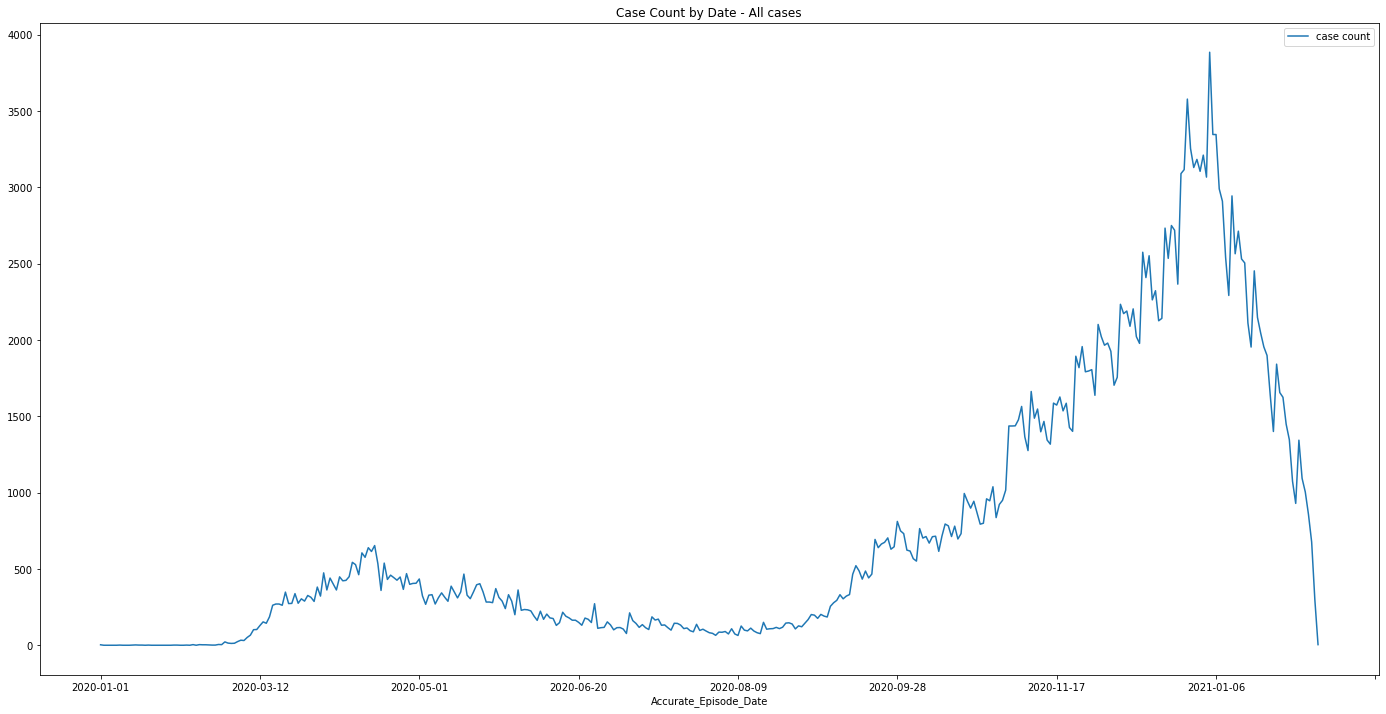

In [17]:
#total cases
covid_df_sum_by_date.plot(y = ["case count"], figsize = (24,12), title = "Case Count by Date - All cases")

In [18]:
##Explore data in dataframes and plots - sum of cases by City
covid_df_sum_by_city = covid_df.groupby(["Reporting_PHU_City"]).sum("case count")
covid_df_sum_by_city

Row_ID  Reporting_PHU_Latitude  \
Reporting_PHU_City                                        
Barrie                795925365            2.581595e+05   
Belleville             48400068            1.608395e+04   
Brantford             206077575            6.688531e+04   
Brockville             92615920            3.662961e+04   
Chatham               168172471            5.491300e+04   
Cornwall              325186184            1.139238e+05   
Guelph                602663621            1.926411e+05   
Hamilton             1314441911            4.163980e+05   
Kenora                 34412211            1.383595e+04   
Kingston              101019772            2.945576e+04   
London                750525696            2.533328e+05   
Mississauga          8321400204            2.476077e+06   
New Liskeard           10348383            4.275836e+03   
Newmarket            3845398192            1.163484e+06   
North Bay              28149611            9.077389e+03   
Oakville             1245546334            3.691492e+05   
Ottawa               1617730656            6.205101e+05   
Owen Sound            100178700            2.924198e+04   
Pembroke               48114524            1.396882e+04   
Peterborough           70434299            2.476461e+04   
Point Edward          250852336            8.064252e+04   
Port Hope             129161982            4.062659e+04   
Sault Ste. Marie       25834085            8.422359e+03   
Simcoe                152842594            5.647343e+04   
St. Thomas            309071449            1.021962e+05   
Stratford             163726885            5.520831e+04   
Sudbury                73346384            2.555635e+04   
Thorold              1070196702            3.539868e+05   
Thunder Bay           140440203            5.140141e+04   
Timmins                40040832            1.425092e+04   
Toronto             12632838408            3.832001e+06   
Waterloo             1241544111            4.253277e+05   
Whitby               1602230352            4.864404e+05   
Windsor              1493571108            5.226406e+05   

                    Reporting_PHU_Longitude  case count  
Reporting_PHU_City                                       
Barrie                        -4.632165e+05        5813  
Belleville                    -2.817049e+04         364  
Brantford                     -1.244253e+05        1550  
Brockville                    -6.215203e+04         821  
Chatham                       -1.064601e+05        1295  
Cornwall                      -1.890828e+05        2530  
Guelph                        -3.551145e+05        4426  
Hamilton                      -7.688415e+05        9626  
Kenora                        -2.626773e+04         278  
Kingston                      -5.096579e+04         666  
London                        -4.789112e+05        5894  
Mississauga                   -4.521806e+06       56729  
New Liskeard                  -7.171347e+03          90  
Newmarket                     -2.099391e+06       26414  
North Bay                     -1.557570e+04         196  
Oakville                      -6.780700e+05        8503  
Ottawa                        -1.036753e+06       13684  
Owen Sound                    -5.309728e+04         656  
Pembroke                      -2.352121e+04         305  
Peterborough                  -4.378163e+04         559  
Point Edward                  -1.545914e+05        1876  
Port Hope                     -7.233607e+04         924  
Sault Ste. Marie              -1.526099e+04         181  
Simcoe                        -1.058404e+05        1318  
St. Thomas                    -1.938701e+05        2389  
Stratford                     -1.031154e+05        1273  
Sudbury                       -4.454893e+04         550  
Thorold                       -6.505704e+05        8210  
Thunder Bay                   -9.479290e+04        1062  
Timmins                       -2.391065e+04         294  
Toronto                       -6.967603e+06 

<AxesSubplot:title={'center':'Case Count by City - All cases'}, xlabel='Reporting_PHU_City'>

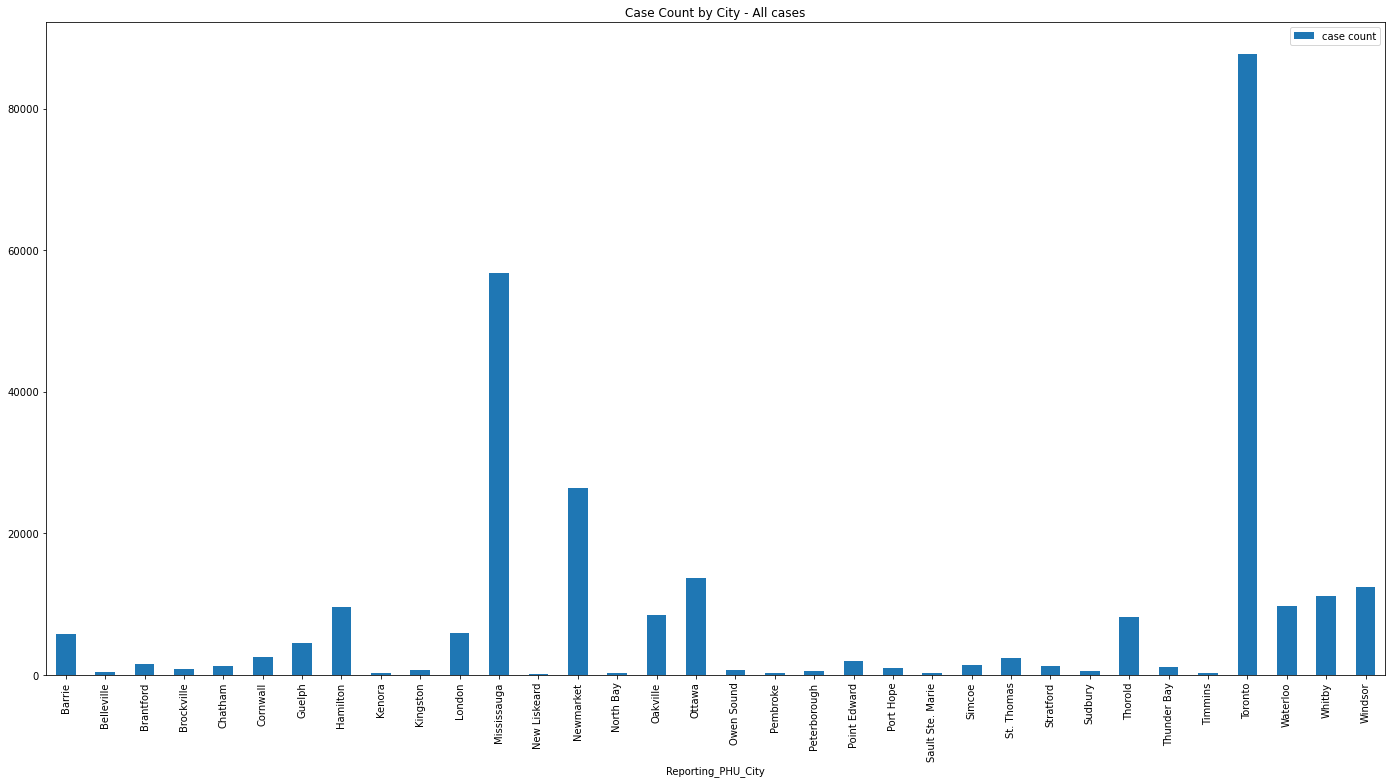

In [19]:
#total by city
covid_df_sum_by_city.plot(kind = "bar", y = ["case count"], figsize = (24,12), title = "Case Count by City - All cases")

In [20]:
#Explore data in dataframes and plots - sum of cases by City and date
covid_df_sum_by_date_by_city = covid_df.groupby(["Accurate_Episode_Date","Reporting_PHU_City"]).sum("case count")
covid_df_sum_by_date_by_city

Row_ID  Reporting_PHU_Latitude  \
Accurate_Episode_Date Reporting_PHU_City                                   
2020-01-01            Simcoe              224938               85.695651   
                      Waterloo             23808               43.462876   
                      Windsor              29153               42.308796   
2020-01-02            Toronto             274262               43.656591   
2020-01-03            Toronto             136114               43.656591   
...                                          ...                     ...   
2021-02-07            Barrie              271636               44.410713   
                      Newmarket           256073               44.048023   
                      Ottawa              261198               45.345665   
                      Toronto             255117               43.656591   
                      Windsor             255302               42.308796   

                                          Reporting_PHU_Longitude  case count  
Accurate_Episode_Date Reporting_PHU_City                                       
2020-01-01            Simcoe                          -160.607630           2  
                      Waterloo                         -80.520913           1  
                      Windsor                          -83.033670           1  
2020-01-02            Toronto                          -79.379358           1  
2020-01-03            Toronto                          -79.379358           1  
...                                                           ...         ...  
2021-02-07            Barrie                           -79.686306           1  
                      Newmarket                        -79.480239           1  
                      Ottawa                           -75.763912           1  
                      Toronto                          -79.379358           1  
                      Windsor                          -83.033670           1  

[8046 rows x 4 columns]

<AxesSubplot:title={'center':'Case Count -Toronto'}, xlabel='Accurate_Episode_Date'>

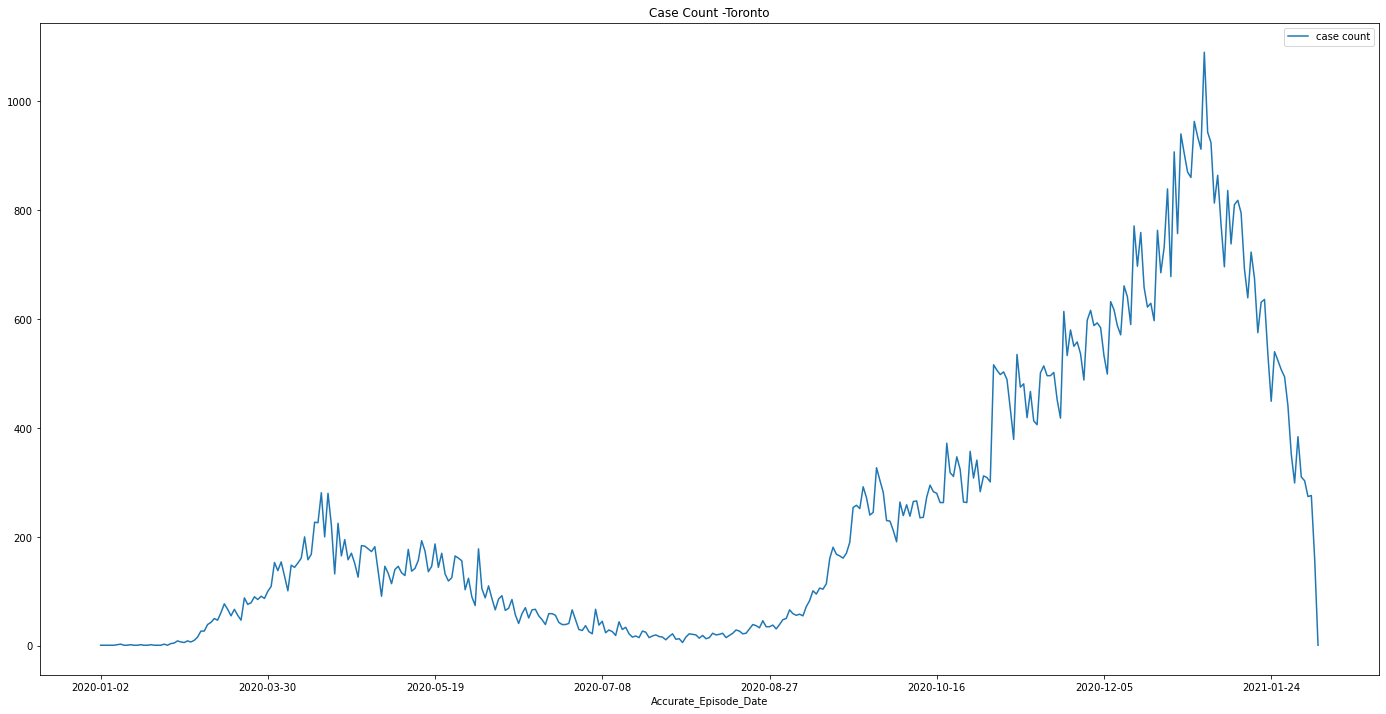

In [21]:
#cases by date toronto
toronto_covid_df = covid_df.loc[covid_df["Reporting_PHU_City"] == "Toronto"].groupby(["Accurate_Episode_Date"]).sum("case count")
toronto_covid_df.plot(kind = "line", y = ["case count"], figsize = (24,12), title = "Case Count -Toronto")

<AxesSubplot:title={'center':'Case Count - Mississauga'}, xlabel='Accurate_Episode_Date'>

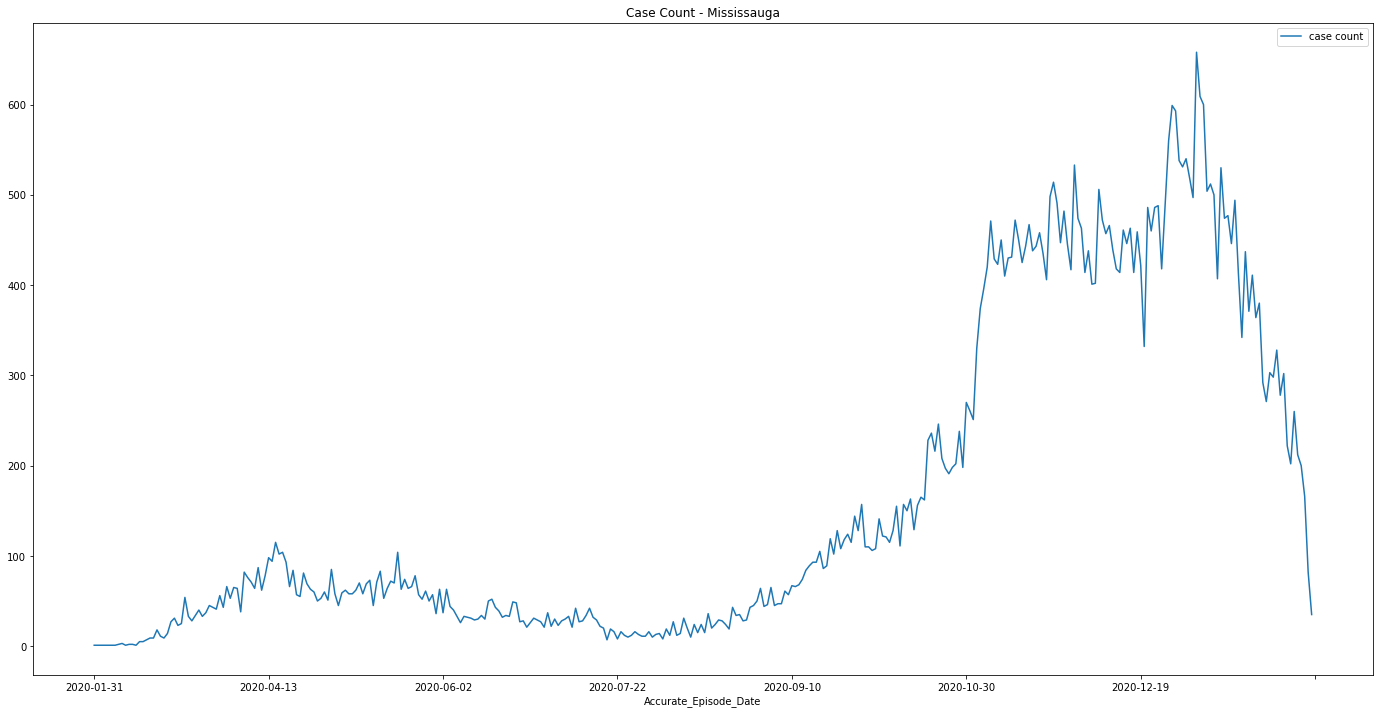

In [22]:
#cases by date Mississauga
Mississauga_covid_df = covid_df.loc[covid_df["Reporting_PHU_City"] == "Mississauga"].groupby(["Accurate_Episode_Date"]).sum("case count")
Mississauga_covid_df.plot(kind = "line", y = ["case count"], figsize = (24,12), title = "Case Count - Mississauga")

<AxesSubplot:title={'center':'Case Count -Guelph'}, xlabel='Accurate_Episode_Date'>

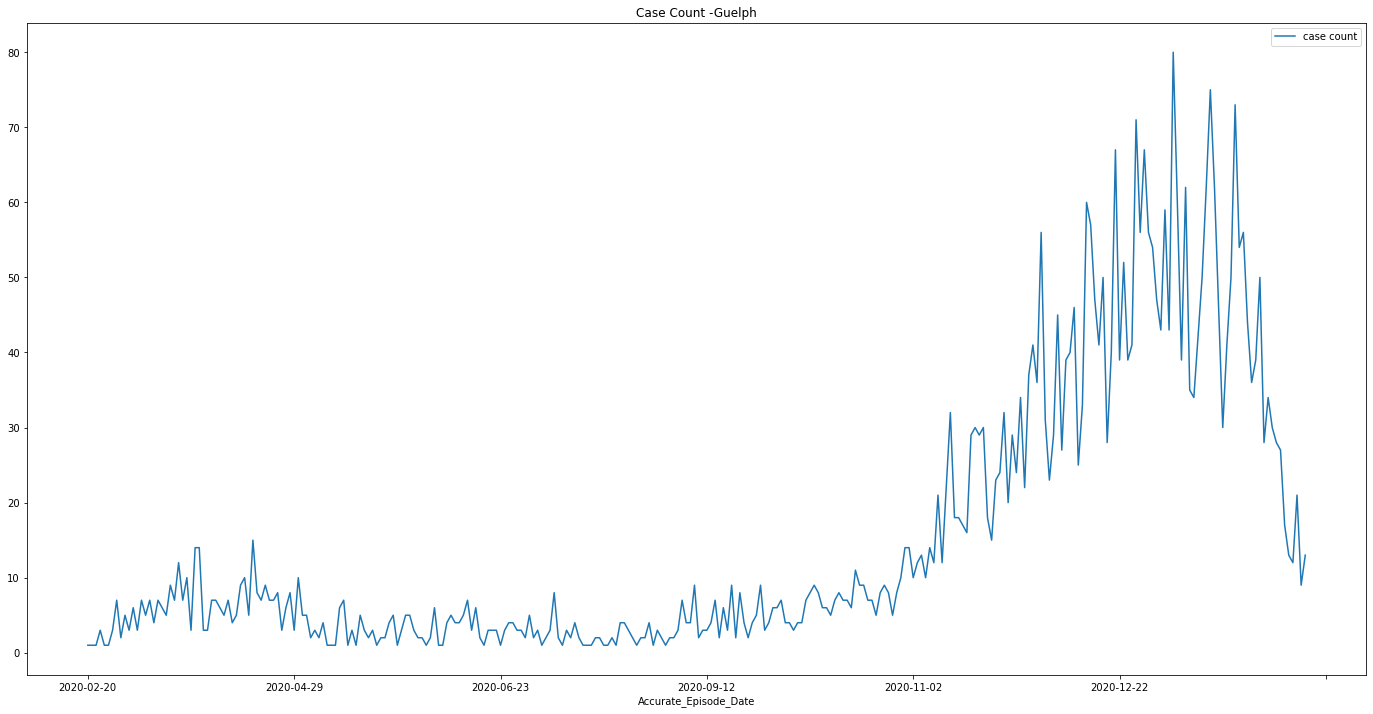

In [23]:
#cases by date Guelph
Guelph_covid_df = covid_df.loc[covid_df["Reporting_PHU_City"] == "Guelph"].groupby(["Accurate_Episode_Date"]).sum("case count")
Guelph_covid_df.plot(kind = "line", y = ["case count"], figsize = (24,12), title = "Case Count -Guelph")

<AxesSubplot:title={'center':'Case Count - Hamilton'}, xlabel='Accurate_Episode_Date'>

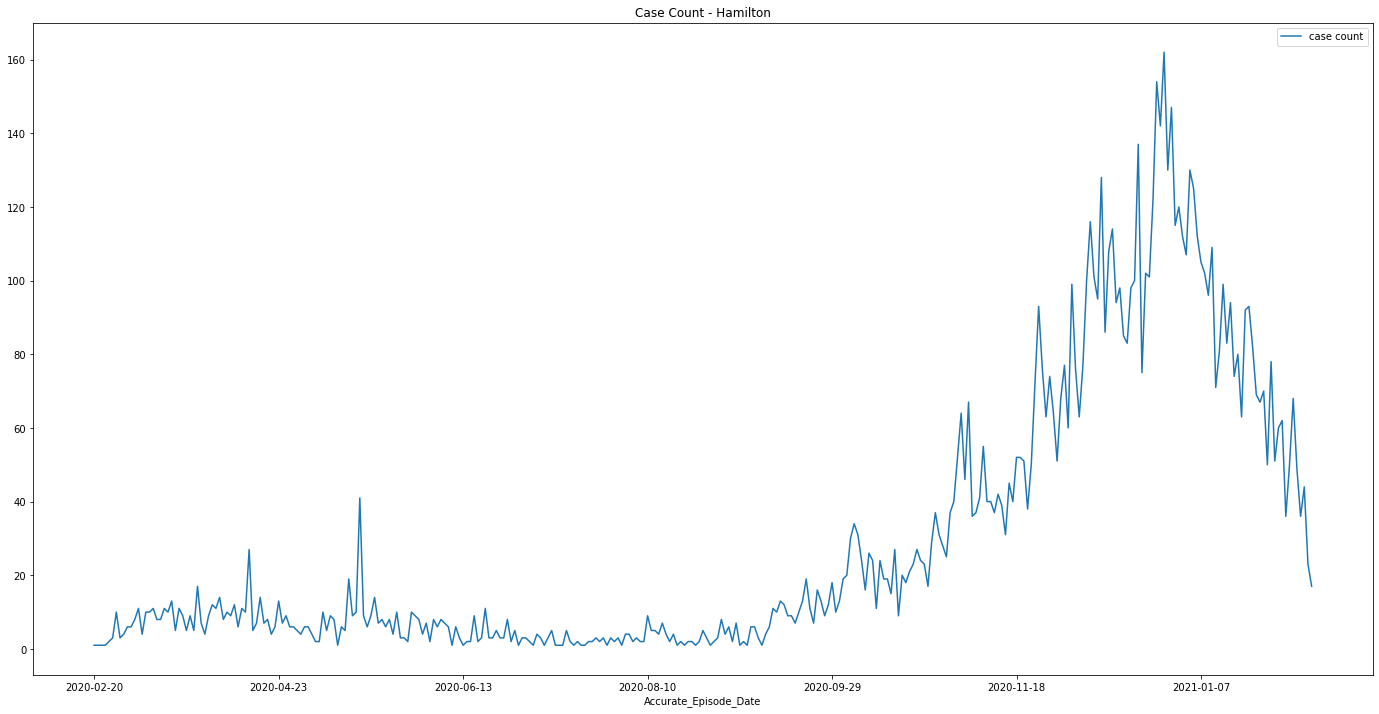

In [24]:
#cases by date Hamilton
Hamilton_covid_df = covid_df.loc[covid_df["Reporting_PHU_City"] == "Hamilton"].groupby(["Accurate_Episode_Date"]).sum("case count")
Hamilton_covid_df.plot(kind = "line", y = ["case count"], figsize = (24,12), title = "Case Count - Hamilton")

<AxesSubplot:title={'center':'Case Count -Oakville'}, xlabel='Accurate_Episode_Date'>

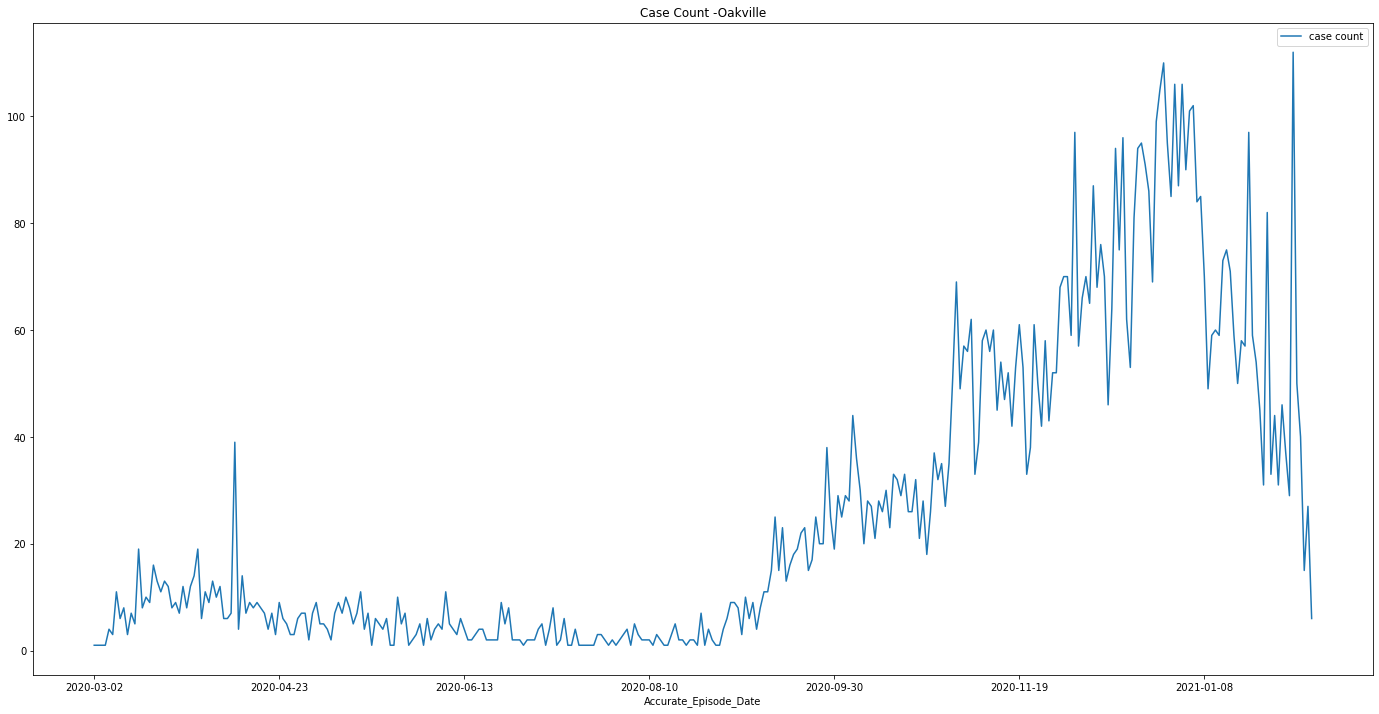

In [25]:
#cases by date toronto
Oakville_covid_df = covid_df.loc[covid_df["Reporting_PHU_City"] == "Oakville"].groupby(["Accurate_Episode_Date"]).sum("case count")
Oakville_covid_df.plot(kind = "line", y = ["case count"], figsize = (24,12), title = "Case Count -Oakville")

<AxesSubplot:title={'center':'Case Count - Waterloo'}, xlabel='Accurate_Episode_Date'>

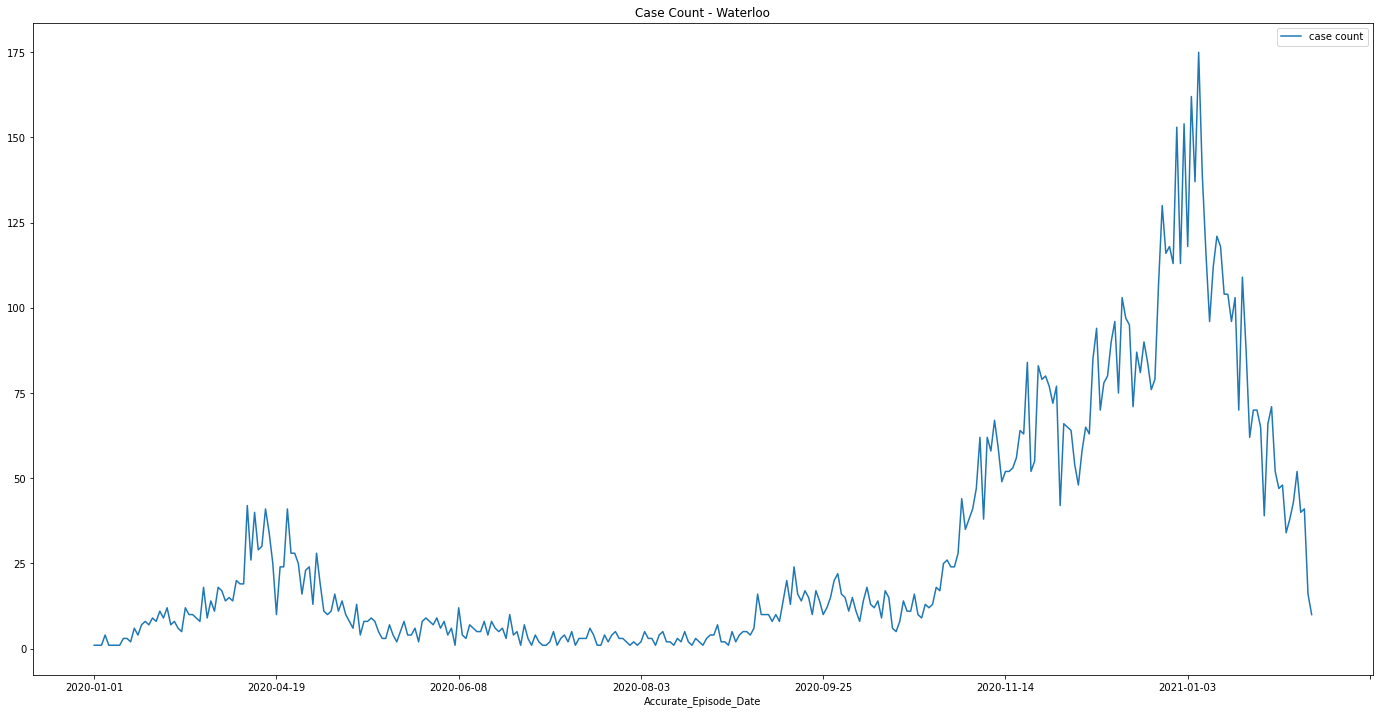

In [26]:
#cases by date toronto
Waterloo_covid_df = covid_df.loc[covid_df["Reporting_PHU_City"] == "Waterloo"].groupby(["Accurate_Episode_Date"]).sum("case count")
Waterloo_covid_df.plot(kind = "line", y = ["case count"], figsize = (24,12), title = "Case Count - Waterloo")

In [27]:
# reshape table to explore views
covid_city_pivot_by_date_and_city = pd.pivot_table(covid_df, values="case count", index=["Accurate_Episode_Date","Reporting_PHU_City", "Reporting_PHU_Latitude","Reporting_PHU_Longitude"], dropna = True, aggfunc=np.sum)
covid_city_pivot_by_date_and_city

case count
Accurate_Episode_Date Reporting_PHU_City Reporting_PHU_Latitude Reporting_PHU_Longitude            
2020-01-01            Simcoe             42.847825              -80.303815                        2
                      Waterloo           43.462876              -80.520913                        1
                      Windsor            42.308796              -83.033670                        1
2020-01-02            Toronto            43.656591              -79.379358                        1
2020-01-03            Toronto            43.656591              -79.379358                        1
...                                                                                             ...
2021-02-07            Barrie             44.410713              -79.686306                        1
                      Newmarket          44.048023              -79.480239                        1
                      Ottawa             45.345665              -75.763912                        1
                      Toronto            43.656591              -79.379358                        1
                      Windsor            42.308796              -83.033670                        1

[8046 rows x 1 columns]

In [28]:
covid_city_pivot_by_date_and_city.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8046 entries, ('2020-01-01', 'Simcoe', 42.84782526, -80.30381491) to ('2021-02-07', 'Windsor', 42.3087965, -83.0336705)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   case count  8046 non-null   int64
dtypes: int64(1)
memory usage: 106.2+ KB


<AxesSubplot:xlabel='Accurate_Episode_Date,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude'>

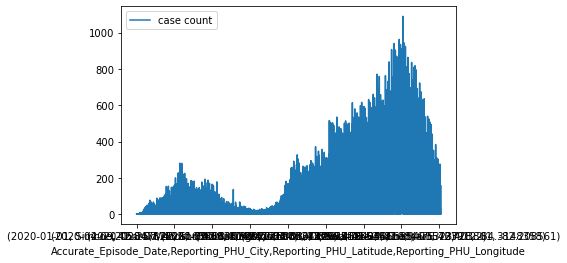

In [29]:
covid_city_pivot_by_date_and_city.plot() #not very useful

In [30]:
all_covid_df_cities = covid_df["Reporting_PHU_City"].unique()
covid_df_cities = "Toronto","Waterloo","Mississauga","Guelph","Hamilton","Oakville"
cities_to_drop = "Simcoe", "Windsor", "Newmarket", "Ottawa","Barrie", "Cornwall", "London", "Thorold", "Belleville", "Guelph", "Hamilton", "Whitby", "Peterborough", "Thunder Bay", "Brockville", "St. Thomas", "Port Hope", "Sudbury", "Kingston", "Timmins", "Point Edward", "Owen Sound", "Brantford", "Chatham", "Stratford", "Sault Ste. Marie", "North Bay", "Pembroke", "Kenora", "New Liskeard"
covid_df_cities, all_covid_df_cities, cities_to_drop

(('Toronto', 'Waterloo', 'Mississauga', 'Guelph', 'Hamilton', 'Oakville'),
 array(['Waterloo', 'Simcoe', 'Windsor', 'Toronto', 'Newmarket', 'Ottawa',
        'Barrie', 'Cornwall', 'London', 'Thorold', 'Mississauga',
        'Belleville', 'Guelph', 'Hamilton', 'Whitby', 'Peterborough',
        'Thunder Bay', 'Brockville', 'St. Thomas', 'Port Hope', 'Oakville',
        'Sudbury', 'Kingston', 'Timmins', 'Point Edward', 'Owen Sound',
        'Brantford', 'Chatham', 'Stratford', 'Sault Ste. Marie',
        'North Bay', 'Pembroke', 'Kenora', 'New Liskeard'], dtype=object),
 ('Simcoe',
  'Windsor',
  'Newmarket',
  'Ottawa',
  'Barrie',
  'Cornwall',
  'London',
  'Thorold',
  'Belleville',
  'Guelph',
  'Hamilton',
  'Whitby',
  'Peterborough',
  'Thunder Bay',
  'Brockville',
  'St. Thomas',
  'Port Hope',
  'Sudbury',
  'Kingston',
  'Timmins',
  'Point Edward',
  'Owen Sound',
  'Brantford',
  'Chatham',
  'Stratford',
  'Sault Ste. Marie',
  'North Bay',
  'Pembroke',
  'Kenora',
  'New 

In [31]:
#pivot on date and city with dates across the top and cities 
covid_df_pivot_by_city  = pd.pivot_table(covid_df, index = ["Accurate_Episode_Date", "Reporting_PHU_City"], values = "case count", aggfunc=np.sum)
covid_df_pivot_by_city.head(5)

case count
Accurate_Episode_Date Reporting_PHU_City            
2020-01-01            Simcoe                       2
                      Waterloo                     1
                      Windsor                      1
2020-01-02            Toronto                      1
2020-01-03            Toronto                      1

In [32]:
covid_df_pivot_by_city.tail(5)

case count
Accurate_Episode_Date Reporting_PHU_City            
2021-02-07            Barrie                       1
                      Newmarket                    1
                      Ottawa                       1
                      Toronto                      1
                      Windsor                      1

In [33]:
covid_df_pivot_by_city.hvplot(width=1000, dynamic=False)

:Curve   [Accurate_Episode_Date]   (case count)

In [34]:
#get case aggregate
covid_agg = covid_df.groupby(['Accurate_Episode_Date','Reporting_PHU_City'])['case count'].sum()
covid_agg

Accurate_Episode_Date  Reporting_PHU_City
2020-01-01             Simcoe                2
                       Waterloo              1
                       Windsor               1
2020-01-02             Toronto               1
2020-01-03             Toronto               1
                                            ..
2021-02-07             Barrie                1
                       Newmarket             1
                       Ottawa                1
                       Toronto               1
                       Windsor               1
Name: case count, Length: 8046, dtype: int64

In [35]:
# PLOT by city yand date
by_city = covid_agg.hvplot(x = 'Accurate_Episode_Date', y = 'case count', groupby='Reporting_PHU_City', width=1500, height = 500)
by_city

:DynamicMap   [Reporting_PHU_City]
   :Curve   [Accurate_Episode_Date]   (case count)

In [36]:
by_city["Toronto"].relabel('Toronto') + by_city["Mississauga"].relabel('Mississauga')+ by_city["Hamilton"].relabel('Hamilton')+ by_city["Oakville"].relabel('Oakville')+ by_city["Guelph"].relabel('Guelph')+ by_city["Waterloo"].relabel('Waterloo')

:Layout
   .Curve.Toronto     :Curve   [Accurate_Episode_Date]   (case count)
   .Curve.Mississauga :Curve   [Accurate_Episode_Date]   (case count)
   .Curve.Hamilton    :Curve   [Accurate_Episode_Date]   (case count)
   .Curve.Oakville    :Curve   [Accurate_Episode_Date]   (case count)
   .Curve.Guelph      :Curve   [Accurate_Episode_Date]   (case count)
   .Curve.Waterloo    :Curve   [Accurate_Episode_Date]   (case count)

In [37]:
cities = ['Toronto','Waterloo','Mississauga','Guelph','Hamilton','Oakville'] 
covid_agg.loc[cities,].hvplot.line('Reporting_PHU_City', by='Accurate_Episode_Date', width=1500, height = 500)

KeyError: "['Toronto' 'Waterloo' 'Mississauga' 'Guelph' 'Hamilton' 'Oakville'] not in index"

In [ ]:
covid_df_pivot_by_city = covid_df_pivot_by_city.drop(labels = ["Simcoe", "Windsor", "Newmarket", "Ottawa","Barrie", "Cornwall", "London", "Thorold", "Belleville", "Guelph", "Hamilton", "Whitby", "Peterborough", "Thunder Bay", "Brockville", "St. Thomas", "Port Hope", "Sudbury", "Kingston", "Timmins", "Point Edward", "Owen Sound", "Brantford", "Chatham", "Stratford", "Sault Ste. Marie", "North Bay", "Pembroke", "Kenora", "New Liskeard"]
                axis=0,
                inplace=False,
                errors='raise',
)
covid_df_pivot_by_city

In [ ]:
# reshape table to drop extra cities and resize table to give total cases per day in columns, dates in index and cities in columns
covid_city_pivot_by_date = pd.pivot_table(covid_df,
                                            values= "case count",
                                            index= "Accurate_Episode_Date",
                                            columns = covid_df["Reporting_PHU_City"] == covid_df_cities,
                                            dropna=True,
                                            aggfunc=np.sum
                                         )
covid_city_pivot_by_date

In [ ]:
covid_city_pivot_by_date #get only what I need

In [ ]:
covid_city_pivot_by_date = covid_city_pivot_by_date.drop(["Simcoe", "Windsor", "Newmarket", "Ottawa",
       "Barrie", "Cornwall", "London", "Thorold", 
       "Belleville", "Guelph", "Hamilton", "Whitby", "Peterborough",
       "Thunder Bay", "Brockville", "St. Thomas", "Port Hope", "Oakville",
       "Sudbury", "Kingston", "Timmins", "Point Edward", "Owen Sound",
       "Brantford", "Chatham", "Stratford", "Sault Ste. Marie",
       "North Bay", "Pembroke", "Kenora", "New Liskeard"])

In [ ]:
#make cities filterable
covid_df_index = pd.Series([1:-1], index=covid_df["Reporting_PHU_City"].unique())
covid_df_index

In [ ]:
covid_df = pd.covid_df(                index=covid_df_index, columns=["A", "B", "C", "D"])

In [ ]:
# select cities
# Filter the dataframe to only contain results in 7 GTA Cities, Accurate Episode Date, Reporting_PHU, Reporting_PHU_Latitude, Reporting_PHU_Longitude
cities_to_drop = [covid_df_index]
cities_to_drop

In [ ]:
covid_city_pivot_by_date.drop(cities_to_drop, axis="Reporting_PHU_City")
covid_city_pivot_by_date

In [ ]:
covid_df = covid_df.drop(labels=[["Reporting_PHU_City"][cities_to_drop]], inplace=True)
covid_df

In [ ]:
covid_city_pivot_by_date.info()

In [ ]:
# preview and cut noise by filtering to focus cities 
covid_city_pivot_by_date.plot(figsize = (35,15))

In [ ]:
covid_city_pivot_by_date.drop(cities_to_drop,
                            axis=1,
                            inplace=False,
)
covid_city_pivot_by_date

In [ ]:
# store pivot table as flatteddataframe
covid_data_df = covid_city_pivot_by_date

In [ ]:
covid_city_pivot_by_date.plot(figsize = (35,15))

In [ ]:
Oakville  = covid_df.loc[covid_df["Reporting_PHU_City"] == "Oakville"].sum()
Oakville

In [ ]:
Waterloo  = covid_df.loc[covid_df["Reporting_PHU_City"] == "Waterloo"].sum()
Waterloo

In [ ]:
covid_df_sum_by_date_by_city

In [ ]:
cities_df = cities_df.dropna()
cities_df

In [ ]:
cities_df.plot(figsize = (28, 18))

In [ ]:
#build a dashboard of views using panel, holoviews, and pyviz by joining population, real estate and COVID data
#Initial Imports
import geopandas as gpd
import json
import pandas as pd
import numpy as np
import math
import time
import pprint
from datetime import date, datetime, timedelta

#Import Map Tools
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter, Label
from bokeh.palettes import brewer
from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select, Button, Text
from bokeh.layouts import widgetbox, row, column

In [ ]:
#inspect curent shape of cities df
cities_df.index()

In [ ]:
#reset episode date as index
cities_df = cities_df.reset_index("Accurate_Episode_Date")
cities_df

In [ ]:
reported_covid_cases_Toronto_by_day = cities_df[["Accurate_Episode_Date","Toronto"]].groupby("Accurate_Episode_Date").aggregate(np.sum)
 

reported_covid_cases_Toronto_by_day.info();

In [ ]:
# add columns and set base for case count, cumulative case count, resolved cased count, cumulative resolved case count, active cases
covid_df["case count"] = 0 # 1 (every row is an incident of a case) + resolved (infections since resolve) + unresolved (new infections)
covid_df["case value"] = 0 # resolved = -1, unresolved = 1
covid_df["net change"] = 0 # CASE COUNT + case value resulting in a -1 as a net changeto reduce cumulative count, when  # no cha)
covid_df["cumulative case count"] = 1
covid_df["cumulative resolved case count"] = 0
covid_df["active cases"] = 1
covid_df

In [ ]:
Mississauga  = covid_df.loc[covid_df["Reporting_PHU_City"] == "Mississauga"].sum()
Mississauga

In [ ]:
Hamilton  = covid_df.loc[covid_df["Reporting_PHU_City"] == "Hamilton"].sum()
Hamilton

In [ ]:
Guelph  = covid_df.loc[covid_df["Reporting_PHU_City"] == "Guelph"].sum()
Guelph

In [ ]:
resolved = -1
unresolved = 1 # if it"s not resolved, it"s a new and active case
case_value = 0 # case value is the value of the row, a Resolved value will remove from active cases
case_count = 1 + resolved + unresolved # if a case is resolved the row is not added to active cases total (cumulative infections less currently resolved)
active_cases = 0 + 

case_count, case_value, resolved, unresolved, active_cases

In [ ]:
#import libraries for mapping
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [ ]:
#solve for case value with an if statement to examine the value of teh Outcome Column
case_value = covid_df["Outcome1"]
case_value
if 

In [ ]:
case_value_test == covid_df.(tostring[]"Outcome1"])
case_count, case_value_test

In [ ]:
if case_value_test = 
case_count, case_value_test

In [ ]:
if covid_df["Outcome1"] == str("Resolved"):
    case_count = case_count - 1
    else:
            
case_count

In [ ]:
#initialize values and set value types as needed
case_count = 0
covid_df["Outcome1"] = covid_df["Outcome1"].values.astype(str)
covid_df.info()

In [ ]:
if covid_df["Outcome1"] == str("Resolved"):

case_value
    
   

In [ ]:
 elseif case_value == "Resolved":
        case_value = case_value - 1
        else:
        case_value = case_value + 0
case_value

In [ ]:
case_count.dtype(), case_value.dtype(), resolved.dtype(), unresolved.dtype()

In [ ]:
case_value = covid_df.(
    ["Outcome1"] == "Resolved":
            case_value = 1
                         elseif:
)                        
case_value

In [ ]:
resolved_case_count = 0
case_value, resolved_case_count

In [ ]:
covid_df["cumulative resolved case count"] = 1
covid_df["active cases"] = 1
covid_df

In [ ]:
resolved_cased_count = covid_df["Case count"] - case_value
resolved_cased_count

In [ ]:
case_count = 0 #every case will count as one
resolved_value = 0
net_change = 0
cu

In [ ]:
# set coordinate variables
Reporting_PHU_Latitude = covid_df[["Reporting_PHU_Latitude"]]
Reporting_PHU_Longitude = covid_df[["Reporting_PHU_Longitude"]]

In [ ]:
# set coordinate variables


In [ ]:
Get 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()

In [ ]:
plt.savefig("coastlines.pdf")

In [ ]:
plt.savefig("coastlines.png")

plt.show()

In [ ]:
# assign a variable to resolved value and a case value. Case Value will be the total 

In [ ]:
net_change = case_count - resolved_value
net change

In [ ]:
#  Define Variable as a -1 to remove the case from the total count and a 1 to add the case to the count
if covid_df.(["Outcome1"]) 	 == str("Resolved"):
        resolved_value = -1
        else :
            resolved value = 1
print(resolved_value)

In [ ]:
covid_city_pivot.plot(figsize = (28, 18))

In [ ]:
toronto  = covid_df.loc[covid_df["Reporting_PHU_City"] == "Toronto"].()
toronto

In [ ]:
covid_city_pivot.plot(y = "case count", kind="line", title="COVID",figsize=(35,25))

In [ ]:
covid_cities = toronto + Mississauga + Waterloo + Guelph + Hamilton + Oakville
covid_cities.head()

In [ ]:
cities_df = pd.DataFrame(covid_city_pivot)
cities_df

In [ ]:
cities_df.dropna()

In [ ]:
# get info about new view - noting memory size
covid_df.info()
covid_df

In [ ]:
# add columns and set base for Type of case and classfies with a resolved (-1) or a 1 for not resolved, case count, cumulative case count, resolved cased count, cumulative resolved case count, active cases
case_type = 0
outcome = covid_df.("Outcome1")
outcome

In [ ]:
# add columns and set base for Type of case and classfies with a resolved (-1) or a 1 for not resolved, case count, cumulative case count, resolved cased count, cumulative resolved case count, active cases
case_type = 0
outcome = covid_df.(Outcome1)
if "Outcome1" == "Resolved", -1;
               else(-1)
              )
set case_counter at 0
covid_df["case count"] = case_counter + case_type
covid_df

In [ ]:
# add columns and set base for case count, cumulative case count, resolved cased count, cumulative resolved case count, active cases
current_cases = count(covid_df.groupby("Accurate_Episode_Date"))
covid_df["cumulative case count"] = 1

In [ ]:
# set formulas and variables for case count, cumulative case count, resolved cased count, cumulative resolved case count, active casescovid_df.dropna(inplace=True)
covid_df

In [ ]:
#create a column for cumulative cases (last cumluative case count plus the number of cases in the curent day)
covid_df["cumulative case count"] = 0
covid_df

In [ ]:
#create a column for each case, as it"s own case - to be used as a case counter and cumulative cases in a group
covid_df["case count"] = 1
covid_df